This notebook covers the basics of neural networks. We will start with a single node network, show how weights work, and then demonstrate what bias does to the sigmoid. Let us get started....

In [5]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-10.0, 10.0, 0.1)
#define a sigmoid function
def sigmoid(value):
    return 1 / (1 + np.exp(-value))

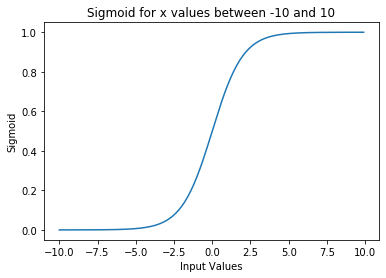

In [7]:
plt.plot(x, sigmoid(x))
plt.xlabel("Input Values")
plt.ylabel("Sigmoid")
plt.title("Sigmoid for x values between -10 and 10")
plt.show()

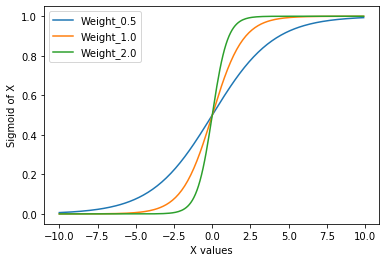

In [15]:
#Let us assume we have a simple neural network with a weight w. Let us see the shape of the
#sigmoid for different values of w.
weights = [0.5, 1.0, 2.0]
weight_labels = [(weights[i], "Weight_" + str(weights[i])) for i in range(len(weights))]
#print(weight_labels)
for w, l in weight_labels:
    plt.plot(x, sigmoid(x * w), label = l)

plt.xlabel("X values")
plt.ylabel("Sigmoid of X")
plt.legend(loc = 2)
plt.show()

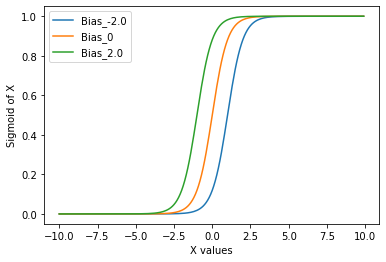

In [16]:
#Let us bring in bias to see what happens
weight = 2
bias = [-2.0, 0, 2.0]
bias_labels = [(bias[i], "Bias_" + str(bias[i])) for i in range(len(bias))]
#print(weight_labels)
for b, l in bias_labels:
    plt.plot(x, sigmoid(x * weight + b), label = l)

plt.xlabel("X values")
plt.ylabel("Sigmoid of X")
plt.legend(loc = 2)
plt.show()

#NOTE THAT BIAS CHANGES WHEN THE NODE ACTIVATES

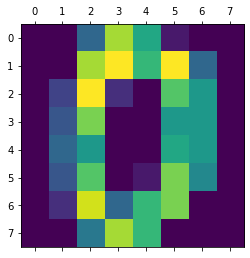

In [205]:
#let us build our own neural network
from sklearn.datasets import load_digits
features = load_digits().images
plt.matshow(features[0])
plt.show()
    

In [206]:
features.shape

(1797, 8, 8)

In [153]:
features = load_digits().data
target = load_digits().target

In [165]:
#Scale the colors using a standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(features)

In [58]:
X.shape #how many rows and columns do we have; Note columns is the number of pixels

(1797, 64)

In [166]:
#we need to convert our target to categorical/one-hot encoded
import numpy as np
def to_categorical(y):
    size = len(y)
    output = np.zeros((size, 10)) #there are 10 digits
    for i in range(size):
        output[i,y[i]] = 1
    return output
    

In [167]:
y = to_categorical(target)
target[2],y[2]

(2, array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]))

In [157]:
#let us split our data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [54]:
x_train[0], y_train[0]

(array([ 0.        ,  0.76759272,  1.00877481,  0.98034282,  0.96867267,
         0.39156287, -0.40972392, -0.12502292, -0.05907756,  2.50561576,
         1.03648545,  0.25665946,  1.19644995,  0.63195789, -0.51499146,
        -0.13043338, -0.04462507, -0.44794995, -1.2133854 , -0.68828364,
         1.44186017,  0.19266199, -0.54880546, -0.11422184, -0.03337973,
        -0.78510524, -1.46862699,  0.71049453,  0.66221904, -1.11591934,
        -0.62889588, -0.04723238,  0.        , -0.67237227, -0.89629737,
         1.10556952,  0.96064411,  0.554775  ,  0.02565019,  0.        ,
        -0.06134367, -0.5312841 , -1.05283456, -0.34600957,  0.53178189,
         1.36346581,  1.74229248, -0.08874162, -0.03543326, -0.40357499,
        -0.97590447, -0.48593156,  0.86476513,  1.20101872,  0.46256313,
        -0.20978513, -0.02359646, -0.29908135,  1.0668035 ,  0.89424571,
         0.24143046, -0.29904339, -0.5056698 , -0.19600752]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]))

In [158]:
#we will need an activation function - let us start with a sigmoid and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [60]:
#Our neural network will be very simple - an input layer, a hidden layer and an output layer
#input layer should be 64, let us have a hidden layer with 32 neurons, and the output
#layer will have 10 neurons (remember it the target is one-hot encoded)
nn_layers = [64, 32, 10]

input_to_hidden_weights = np.random.random_sample((32, 64))
hidden_to_output_weights = np.random.random_sample((10, 32))
bias_1 = np.random.random_sample((32,))
bias_2 = np.random.random_sample((10,))

In [61]:
#feed-forward
#output of hidden layer
def feedforward(x): #x is the input
    hidden_output = sigmoid(x.dot(input_to_hidden_weights) + bias_1)
    final_output = sigmoid(hidden_output.dot(hidden_to_output_weights) + bias_2)
    return hidden_output, final_output

In [ ]:
def train_nn(x, y, iterations = 25000, alpha = 0.25):
    global nn_layers, input_to_hidden_weights, hidden_to_output_weights, bias_1, bias_2
    iters = 0
    m = len(y) #to get average later on
    average_cost_function = []
    print("Starting {} iterations".format(iterations))
    while iters < iterations:
        if iters % 1000 == 0:
            print("Iteration {} out of {}".format(iters, iterations))
        

In [161]:
class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.input_nodes**-0.5, 
                                       (self.input_nodes, self.hidden_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.output_nodes))
        self.lr = learning_rate
        
    
    def activation_function(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return sigmoid(x) * (1 - sigmoid(x))
    
    def softmax(self, x):
        return np.exp(x) / np.sum(np.exp(x))

    def train(self, features, targets):
        ''' Train the network on batch of features and targets. 
        
            Arguments
            ---------
            
            features: 2D array, each row is one data record, each column is a feature
            targets: 1D array of target values
        
        '''
        n_records = features.shape[0]
        delta_weights_i_h = np.zeros(self.weights_input_to_hidden.shape)
        delta_weights_h_o = np.zeros(self.weights_hidden_to_output.shape)
        for X, y in zip(features, targets):
            
            final_outputs, hidden_outputs = self.forward_pass_train(X)  # Implement the forward pass function below
            # Implement the backproagation function below
            delta_weights_i_h, delta_weights_h_o = self.backpropagation(final_outputs, hidden_outputs, X, y, 
                                                                        delta_weights_i_h, delta_weights_h_o)
        self.update_weights(delta_weights_i_h, delta_weights_h_o, n_records)


    def forward_pass_train(self, X):
        ''' Implement forward pass here 
         
            Arguments
            ---------
            X: features batch

        '''
        #### Implement the forward pass here ####
        ### Forward pass ###
        # TODO: Hidden layer - Replace these values with your calculations.
        hidden_inputs = np.dot(X, self.weights_input_to_hidden) # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer

        # TODO: Output layer - Replace these values with your calculations.
        final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output) # signals into final output layer
        final_outputs = self.activation_function(final_inputs) # signals from final output layer
        #print(final_outputs)
        return final_outputs, hidden_outputs

    def backpropagation(self, final_outputs, hidden_outputs, X, y, delta_weights_i_h, delta_weights_h_o):
        ''' Implement backpropagation
         
            Arguments
            ---------
            final_outputs: output from forward pass
            y: target (i.e. label) batch
            delta_weights_i_h: change in weights from input to hidden layers
            delta_weights_h_o: change in weights from hidden to output layers

        '''
        #### Implement the backward pass here ####
        ### Backward pass ###

        # TODO: Output error - Replace this value with your calculations.
        error = y - final_outputs # Output layer error is the difference between desired target and actual output.
        
        # TODO: Calculate the hidden layer's contribution to the error
        
        
        # TODO: Backpropagated error terms - Replace these values with your calculations.
        output_error_term = error * final_outputs * (1 - final_outputs)
        hidden_error = np.dot(self.weights_hidden_to_output, output_error_term)
        hidden_error_term = hidden_error * hidden_outputs * ( 1 - hidden_outputs)
        
        # Weight step (input to hidden)
        delta_weights_i_h += hidden_error_term * X[:, None]
        # Weight step (hidden to output)
        delta_weights_h_o += output_error_term * hidden_outputs[:, None]
        return delta_weights_i_h, delta_weights_h_o

    def update_weights(self, delta_weights_i_h, delta_weights_h_o, n_records):
        ''' Update weights on gradient descent step
         
            Arguments
            ---------
            delta_weights_i_h: change in weights from input to hidden layers
            delta_weights_h_o: change in weights from hidden to output layers
            n_records: number of records

        '''
        self.weights_hidden_to_output += self.lr * delta_weights_h_o / n_records # update hidden-to-output weights with gradient descent step
        self.weights_input_to_hidden += self.lr * delta_weights_i_h / n_records # update input-to-hidden weights with gradient descent step

    def run(self, features):
        ''' Run a forward pass through the network with input features 
        
            Arguments
            ---------
            features: 1D array of feature values
        '''
        
        #### Implement the forward pass here ####
        # TODO: Hidden layer - replace these values with the appropriate calculations.
        hidden_inputs = np.dot(features, self.weights_input_to_hidden) # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer
        
        # TODO: Output layer - Replace these values with the appropriate calculations.
        final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output) # signals into final output layer
        final_outputs = self.activation_function(final_inputs) # signals from final output layer 
        
        return final_outputs

    def evaluate(self , test_data ):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network’s output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.run(x)), np.argmax(y)) for (x, y) in test_data ]
        return sum(int(x == y) for (x, y) in test_results )



In [172]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [200]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
nn = NeuralNetwork(64,32,10, 0.1)
iterations = 10001
np.random.seed(9)
training_accuracies = []
test_accuracies = []
for ii in range(1, iterations):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(range(len(x_train)), 128)
    x_train_batch = x_train[batch]
    y_train_batch = y_train[batch]
    nn.train(x_train_batch, y_train_batch)
    
    if ii % 500 == 0:
        training_accuracy = nn.evaluate(zip(x_train, y_train)) / len(y_train)
        test_accuracy = nn.evaluate(zip(x_test, y_test)) / len(y_test)
        training_accuracies.append(training_accuracy)
        test_accuracies.append(test_accuracy)
        print("Progress:{:.2f}% -- Train Accuracy: {:.2f}% -- Test Accuracy: {:.2f}%".format( 
                                            100 * ii / float(iterations - 1), 
                                            training_accuracy * 100, test_accuracy * 100))
        


Progress:5.00% -- Train Accuracy: 61.18% -- Test Accuracy: 60.00%
Progress:10.00% -- Train Accuracy: 81.30% -- Test Accuracy: 78.70%
Progress:15.00% -- Train Accuracy: 91.01% -- Test Accuracy: 88.52%
Progress:20.00% -- Train Accuracy: 93.64% -- Test Accuracy: 91.85%
Progress:25.00% -- Train Accuracy: 94.35% -- Test Accuracy: 92.41%
Progress:30.00% -- Train Accuracy: 95.39% -- Test Accuracy: 93.33%
Progress:35.00% -- Train Accuracy: 96.02% -- Test Accuracy: 93.70%
Progress:40.00% -- Train Accuracy: 96.74% -- Test Accuracy: 94.07%
Progress:45.00% -- Train Accuracy: 97.06% -- Test Accuracy: 94.07%
Progress:50.00% -- Train Accuracy: 97.45% -- Test Accuracy: 94.26%
Progress:55.00% -- Train Accuracy: 97.61% -- Test Accuracy: 94.63%
Progress:60.00% -- Train Accuracy: 97.93% -- Test Accuracy: 95.19%
Progress:65.00% -- Train Accuracy: 98.01% -- Test Accuracy: 95.74%
Progress:70.00% -- Train Accuracy: 98.17% -- Test Accuracy: 96.11%
Progress:75.00% -- Train Accuracy: 98.17% -- Test Accuracy: 96.

In [198]:
nn.evaluate(zip(x_test, y_test)) / len(y_test)

0.9629629629629629

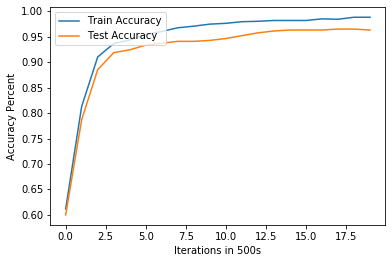

In [204]:
import matplotlib.pyplot as plt
plt.plot(range(len(training_accuracies)),training_accuracies,  label = "Train Accuracy")
plt.plot(range(len(test_accuracies)), test_accuracies,  label = "Test Accuracy")
plt.xlabel("Iterations in 500s")
plt.ylabel("Accuracy Percent")
plt.legend(loc = 'upper left')
plt.show()